In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-paper')
import seaborn as sns
from tqdm import tqdm_notebook

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
train_df.drop('id', axis=1, inplace=True)
Id = test_df['id']
test_df.drop('id', axis=1, inplace=True)

In [4]:
train_df.head(10)

,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,n_photos,...,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13,price
0,2011-1,560,NaN,2,59,3,0,30.0,1.0,5,...,0,0,0,0,0,0,0,0,0,4510000
1,2011-1,667,NaN,10,50,2,1,25.0,NaN,1,...,0,0,0,0,0,0,0,0,0,13231000
2,2011-1,90,0.0,1,48,2,0,25.0,0.0,1,...,0,0,0,0,0,0,0,0,0,2008000
3,2011-1,94,1.0,3,62,3,1,30.0,NaN,3,...,0,0,0,0,0,0,0,0,0,12680000
4,2011-1,232,0.0,3,60,3,0,25.0,NaN,3,...,0,0,0,0,0,0,0,0,0,3335000
5,2011-1,453,1.0,5,52,2,0,30.0,1.0,1,...,0,0,0,0,0,0,0,0,0,3612000
6,2011-1,44,NaN,1,33,1,0,30.0,1.0,0,...,0,0,0,0,0,0,0,0,0,559000
7,2011-1,74,2.0,16,44,1,2,20.0,0.0,1,...,0,0,0,0,0,0,0,0,0,4080000
8,2011-1,198,1.0,10,52,2,1,15.0,0.0,5,...,0,0,0,0,0,0,0,0,0,6971000
9,2011-1,522,NaN,1,60,3,0,25.0,1.0,7,...,0,0,0,0,0,0,0,0,0,3099000


In [5]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
street_id,100000.0,3.344793e+02,1.940048e+02,0.0,167.0,334.0,501.0,671.0
build_tech,70265.0,5.298370e-01,5.736453e-01,0.0,0.0,0.0,1.0,2.0
floor,100000.0,5.267680e+00,3.905558e+00,1.0,2.0,4.0,7.0,25.0
area,100000.0,5.225343e+01,1.779250e+01,29.0,40.0,52.0,60.0,217.0
rooms,100000.0,2.118680e+00,8.296879e-01,1.0,1.0,2.0,3.0,6.0
balcon,100000.0,3.967400e-01,5.476316e-01,0.0,0.0,0.0,1.0,2.0
metro_dist,95104.0,2.215443e+01,8.286241e+00,0.0,15.0,25.0,30.0,30.0
g_lift,70008.0,5.009856e-01,5.000026e-01,0.0,0.0,1.0,1.0,1.0
n_photos,100000.0,2.470910e+00,1.944981e+00,0.0,1.0,2.0,4.0,11.0
kw1,100000.0,5.565000e-02,2.292457e-01,0.0,0.0,0.0,0.0,1.0


  **Подсчитаем количество пропущенных элементов в каждом столбце**

In [6]:
pd.DataFrame(train_df.isna().sum()).T

,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,n_photos,...,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13,price
0,0,0,29735,0,0,0,0,4896,29992,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
pd.DataFrame(test_df.isna().sum()).T

,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,n_photos,...,kw4,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13
0,0,0,30020,0,0,0,0,5117,29814,0,...,0,0,0,0,0,0,0,0,0,0


# Препроцессинг

Посмотим как дата влияет на цену

In [8]:
train_df['date'].unique()

array(['2011-1', '2011-10', '2011-11', '2011-12', '2011-2', '2011-3',
       '2011-4', '2011-5', '2011-6', '2011-7', '2011-8', '2011-9',
       '2012-1', '2012-10', '2012-11', '2012-12', '2012-2', '2012-3'],
      dtype=object)

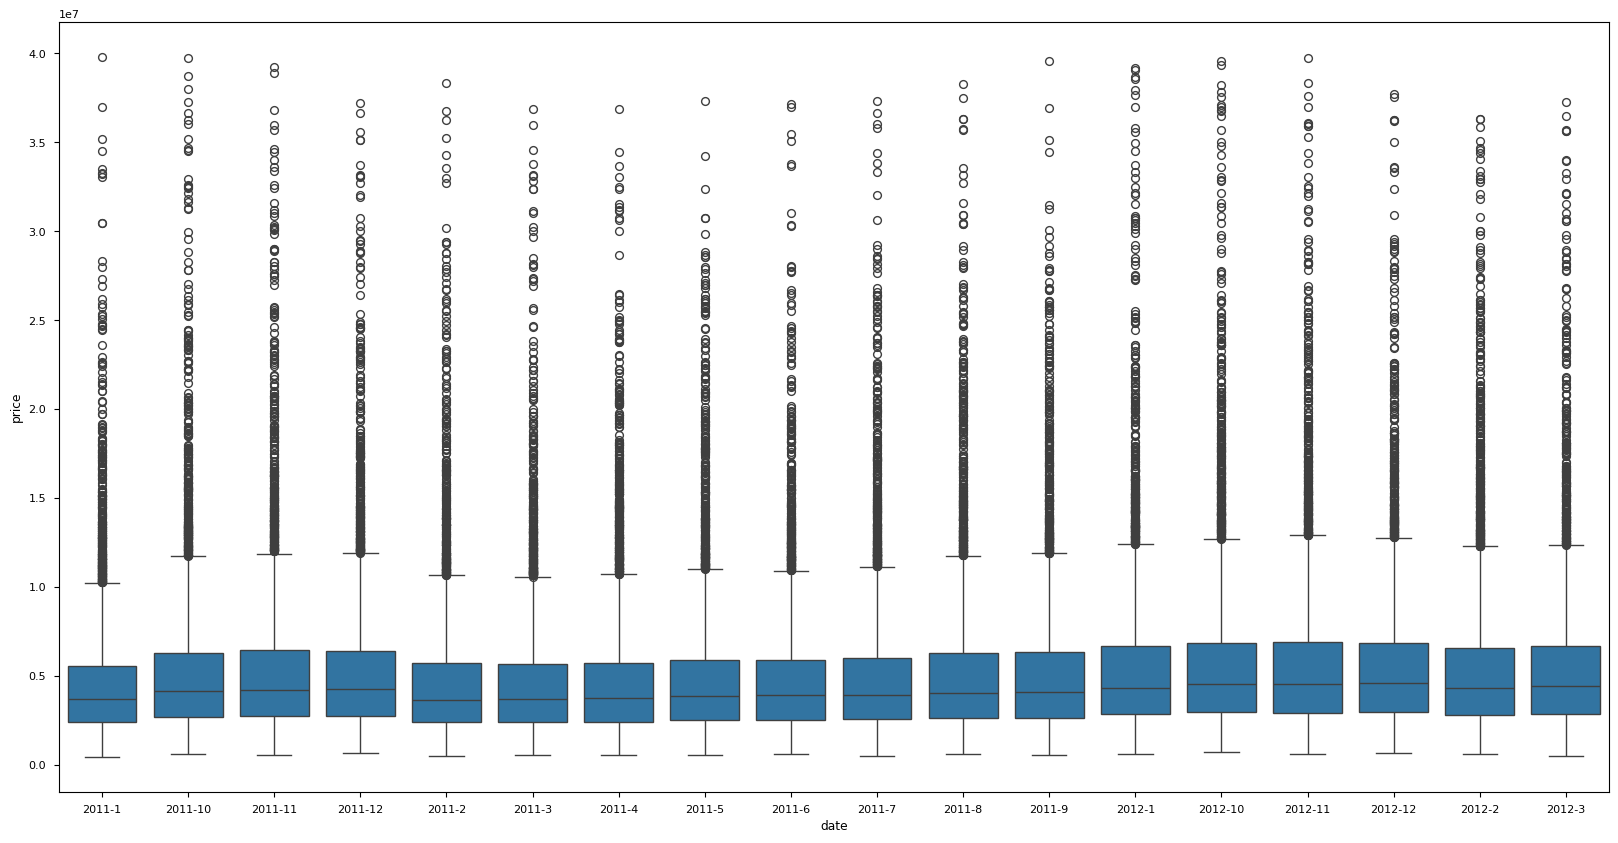

In [9]:
fig = plt.figure(figsize=(20, 10))
sns.boxplot(data=train_df[train_df['price'] < 4e7], x="date", y="price")
plt.show()

Как видно, дата в среднем не влияет на цену. <br> 
Также в выборке имеются выбросы. <br> 
Для начальной модели выбросим дату

In [10]:
train_df['price'][train_df['price'] > 4e7].count()

99

In [11]:
train_df.drop('date', axis=1, inplace=True)
test_df.drop('date', axis=1, inplace=True)

  **Для заполнения пропущенных данных построим матрицу корреляции между всеми признаками**

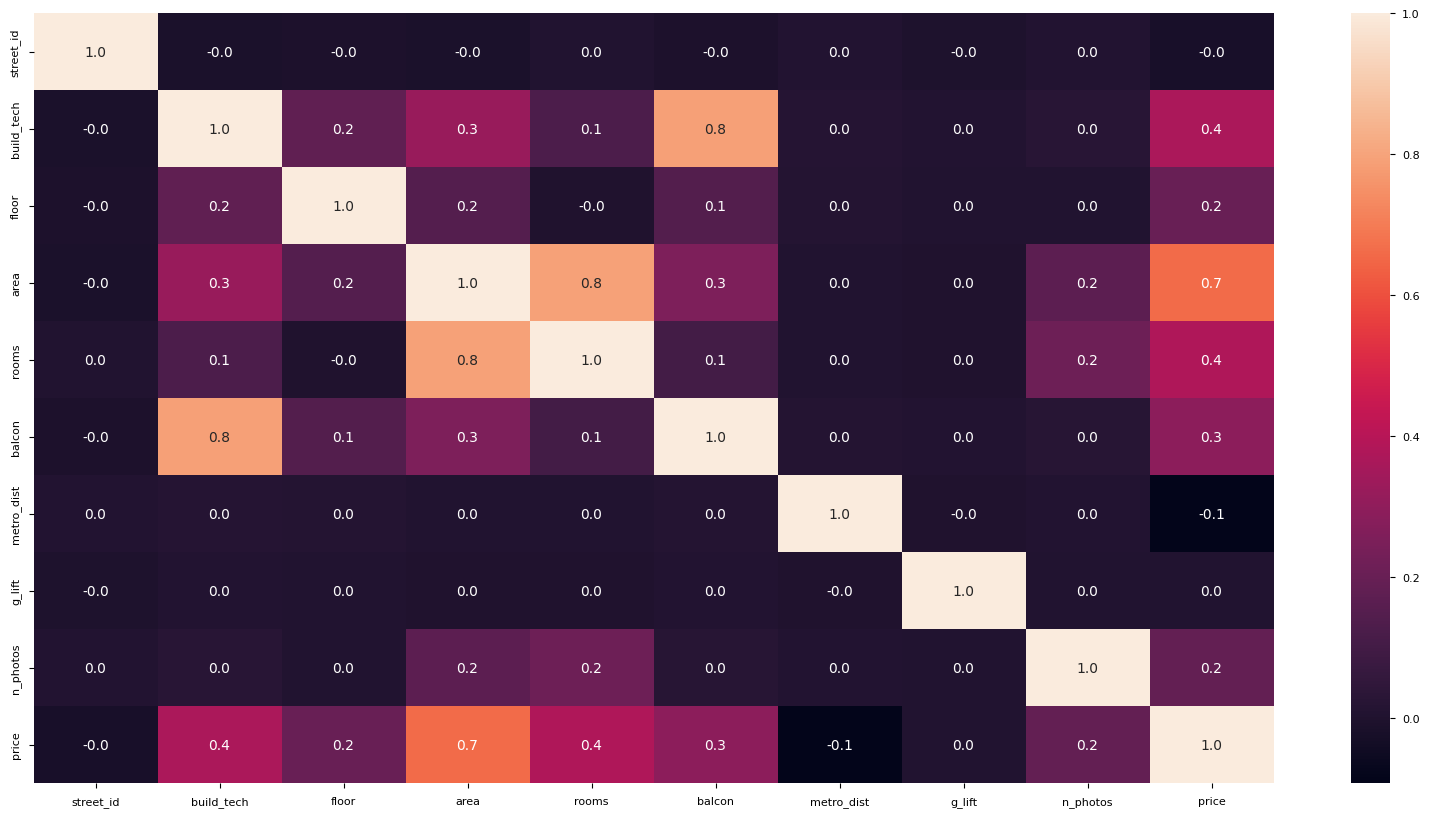

In [12]:
fig = plt.figure(figsize=(20, 10))
drop_col = ['kw1', 'kw2', 'kw3', 'kw4', 'kw5', 'kw6', 'kw7', 'kw8', 'kw9', 'kw10', 'kw11', 'kw12', 'kw13']
sns.heatmap(train_df.drop(drop_col, axis=1).corr(numeric_only=True).transpose(), fmt=".1f", annot=True)
plt.show()

build_tech сильно коррелируется с balcon

In [13]:
train_df['build_tech'].unique()

array([nan,  0.,  1.,  2.])

In [14]:
train_df['balcon'].unique()

array([0, 1, 2])

In [15]:
train_df[train_df.build_tech == train_df.balcon].count()

street_id     61611
build_tech    61611
floor         61611
area          61611
rooms         61611
balcon        61611
metro_dist    58613
g_lift        43115
n_photos      61611
kw1           61611
kw2           61611
kw3           61611
kw4           61611
kw5           61611
kw6           61611
kw7           61611
kw8           61611
kw9           61611
kw10          61611
kw11          61611
kw12          61611
kw13          61611
price         61611
dtype: int64

61611 балконов и билд_техов совпадают + 30000 nan 

Необходимо заполнить пропуски в metro_dist для этого заполним средним значением по street_id

In [16]:
from collections import defaultdict
street_mean_dist = defaultdict(list)
for id in train_df['street_id'].unique():
  street_mean_dist[id] = train_df['metro_dist'][train_df['street_id'] == id].mean()

In [17]:
train_df.metro_dist = train_df.metro_dist.fillna(train_df.street_id.map(street_mean_dist))
test_df.metro_dist = test_df.metro_dist.fillna(test_df.street_id.map(street_mean_dist))

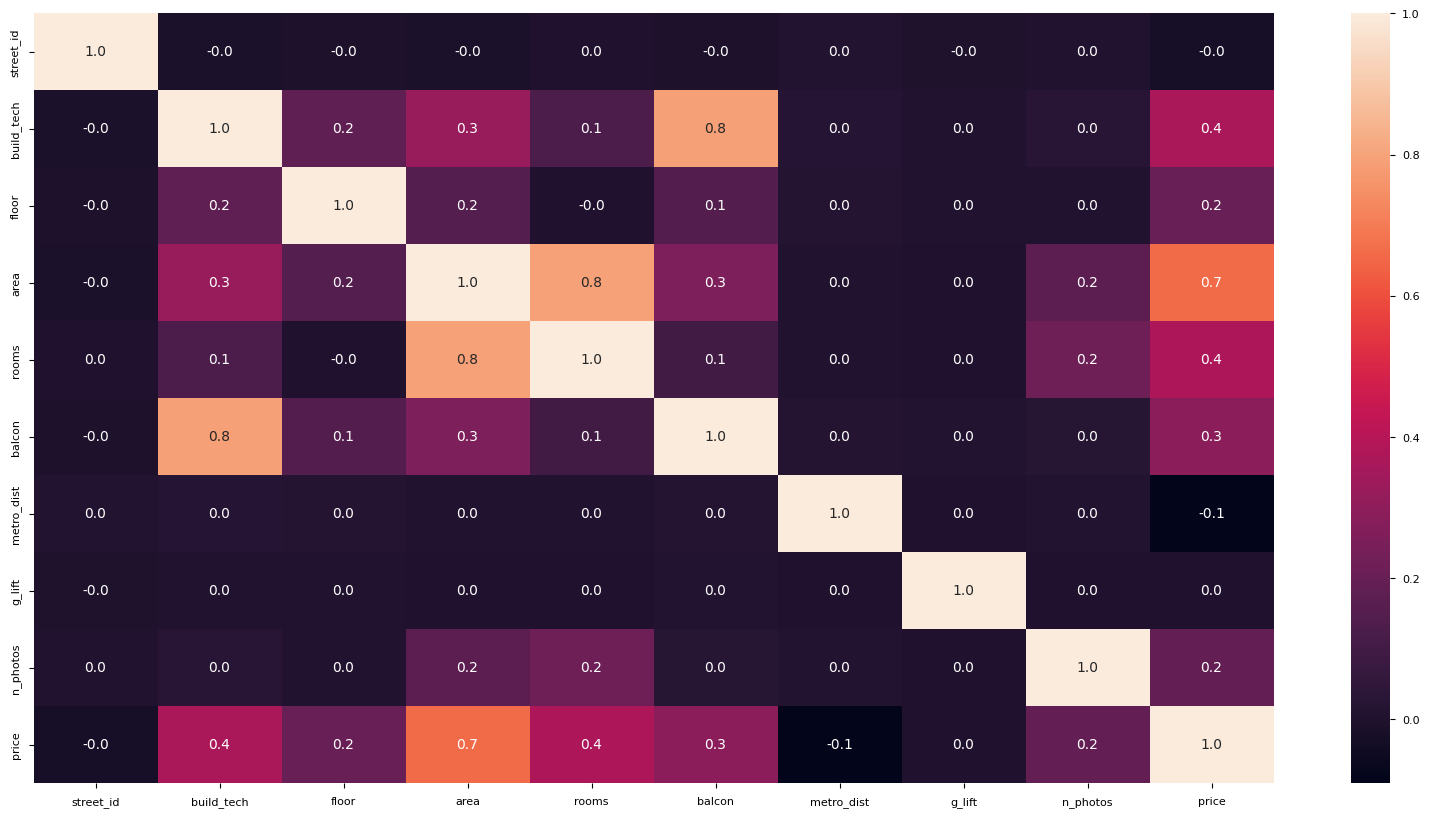

In [18]:
fig = plt.figure(figsize=(20, 10))
drop_col = ['kw1', 'kw2', 'kw3', 'kw4', 'kw5', 'kw6', 'kw7', 'kw8', 'kw9', 'kw10', 'kw11', 'kw12', 'kw13']
sns.heatmap(train_df.drop(drop_col, axis=1).corr(numeric_only=True).transpose(), fmt=".1f", annot=True)

plt.show()

# Обучение и выбор базовой модели

In [19]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error
from lightgbm.sklearn import LGBMRegressor

In [20]:
def score(y1, y2):
  return 1 / (1 + mean_absolute_error(y1, y2))

In [21]:
y = train_df['price'];
x = train_df.drop(['price'], axis=1)

In [22]:
X_train, X_val, y_train, y_val = train_test_split(x, y,
                                                  train_size=0.8, random_state=42, shuffle=True)

Построим алгоритм бустинга с дефолтными настройками

In [23]:
model = LGBMRegressor(verbose=-1)

model.fit(X_train, y_train)

LGBMRegressor(verbose=-1)

In [24]:
cross_val_score(model, X_train, y_train, cv=5, scoring='r2').mean()

0.6601048933414007

In [25]:
sort = np.argsort(model.feature_importances_ / sum(model.feature_importances_) * 100)[::-1]

In [26]:
feature_name = []
for i in sort:
    feature_name.append(model.feature_name_[i])

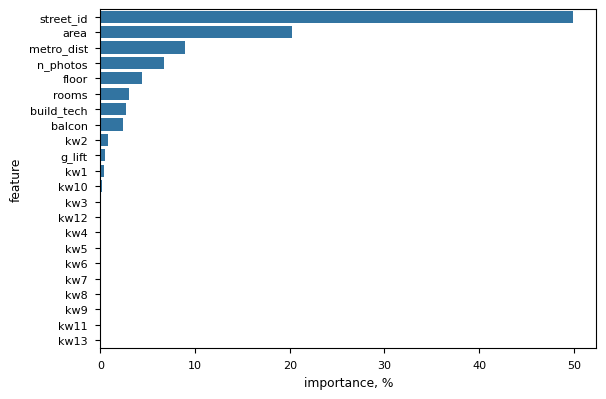

In [27]:
sns.barplot(x=model.feature_importances_[sort] / sum(model.feature_importances_) * 100, y=feature_name)
plt.xlabel("importance, %")
plt.ylabel("feature")
plt.show()

kw и g_lift дают очень малый вклад, впоследствии можно удалить эти признаки

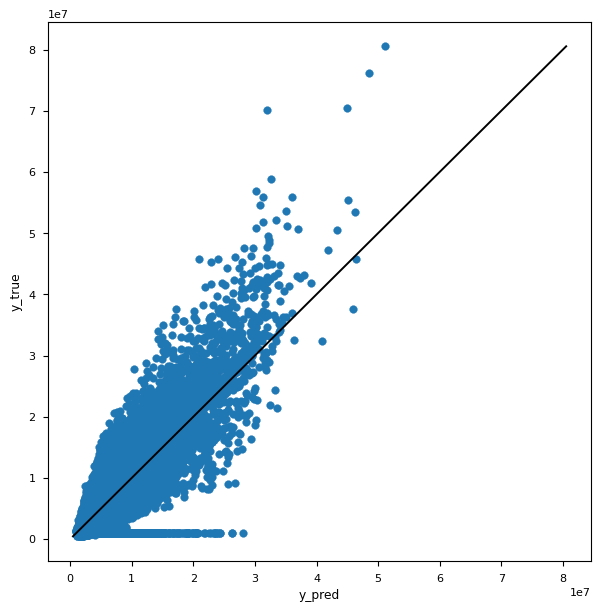

In [28]:
fig = plt.figure(figsize=(7, 7))
plt.scatter(model.predict(X_train), y_train)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='black')
plt.xlabel('y_pred')
plt.ylabel('y_true')
plt.show()

In [29]:
model.score(X_val, y_val)

0.675137375514401

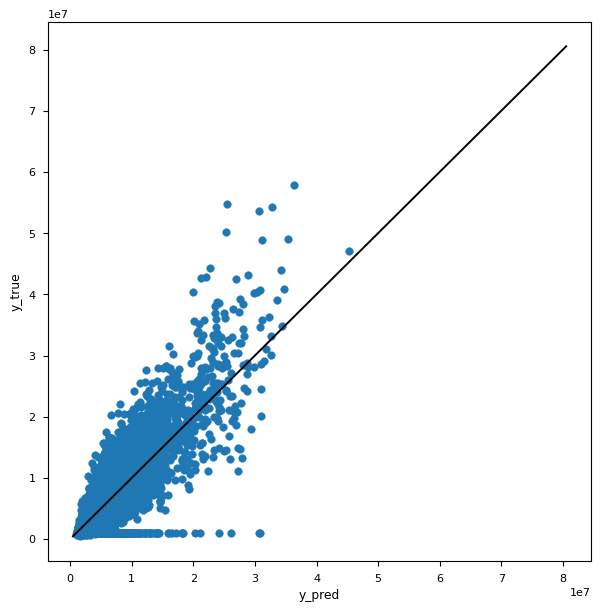

In [30]:
fig = plt.figure(figsize=(7, 7))
plt.scatter(model.predict(X_val), y_val)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='black')
plt.xlabel('y_pred')
plt.ylabel('y_true')
plt.show()

Оптимизируем параметры бустинга 

In [31]:
import optuna
import plotly

In [32]:
from sklearn.metrics import mean_squared_error, r2_score

In [33]:
def objective(trial):
    
    X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=2024)
    
    param = {
        'n_jobs': -1,
        'metric': 'l2', 
        'random_state': 2024,
        
        'n_estimators': trial.suggest_int('n_estimators', 500, 10000),
        'max_depth': trial.suggest_int('max_depth', 10, 200),
        'num_leaves' : trial.suggest_int('num_leaves', 1, 1000),
        'min_child_samples': trial.suggest_int('min_child_samples', 20, 300),
        
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-3, 10.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-3, 10.0),
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.2),
        
        'subsample': trial.suggest_categorical('subsample', [0.5, 0.7, 0.8, 0.9, 1.0]),
        'subsample_freq': trial.suggest_categorical('subsample_freq', [10, 50 ,100, 1000]),

        'early_stopping_rounds': 100,
        'verbose': -1
    }
    
    model = LGBMRegressor(**param)  
    
    model.fit(X_train, y_train, eval_set=[(X_val, y_val)])
    
    preds = model.predict(X_val)
    
    return mean_squared_error(y_val, preds)

In [34]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

[I 2024-05-10 13:03:07,262] A new study created in memory with name: no-name-eabcef63-163b-4152-99be-aaa068d47d45
[I 2024-05-10 13:03:09,505] Trial 0 finished with value: 5333971683911.886 and parameters: {'n_estimators': 8345, 'max_depth': 197, 'num_leaves': 109, 'min_child_samples': 55, 'reg_alpha': 6.627582170040786, 'reg_lambda': 9.887396362308571, 'learning_rate': 0.12122681079800865, 'subsample': 1.0, 'subsample_freq': 1000}. Best is trial 0 with value: 5333971683911.886.
[I 2024-05-10 13:03:12,714] Trial 1 finished with value: 5516502042053.087 and parameters: {'n_estimators': 2227, 'max_depth': 49, 'num_leaves': 248, 'min_child_samples': 76, 'reg_alpha': 9.756806119450125, 'reg_lambda': 9.169243884868362, 'learning_rate': 0.18270377715593752, 'subsample': 1.0, 'subsample_freq': 50}. Best is trial 0 with value: 5333971683911.886.
[I 2024-05-10 13:03:28,476] Trial 2 finished with value: 5612204447347.189 and parameters: {'n_estimators': 2133, 'max_depth': 146, 'num_leaves': 531, 

In [35]:
params = {
        'n_jobs': -1,
        'metric': 'l2', 
        'random_state': 2024,
        
        'n_estimators': 0,
        'max_depth': 0,
        'num_leaves' : 0,
        'min_child_samples': 0,
        
        'reg_alpha': 0,
        'reg_lambda': 0,
        'learning_rate': 0,
        
        'subsample': 0,
        'subsample_freq': 0,

        'early_stopping_rounds': 100,
        'verbose': -1
}
for key, val in study.best_params.items():
    params[key] = val

In [36]:
X_train, X_val, y_train, y_val = train_test_split(x, y,
                                                  train_size=0.8, random_state=42, shuffle=True)

In [37]:
model = LGBMRegressor(**params)

model.fit(X_train, y_train, eval_set=[(X_val, y_val)])

LGBMRegressor(early_stopping_rounds=100, learning_rate=0.031536335565194265,
              max_depth=178, metric='l2', min_child_samples=24,
              n_estimators=3573, n_jobs=-1, num_leaves=28, random_state=2024,
              reg_alpha=3.282559253280893, reg_lambda=3.850533610186443,
              subsample_freq=1000, verbose=-1)

In [38]:
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

print("R2 for train samples", r2_score(y_train, y_train_pred))
print("R2 for validation samples",r2_score(y_val, y_val_pred))

print("Score for train samples", score(y_train, y_train_pred))
print("Score for validation samples",score(y_val, y_val_pred))

R2 for train samples 0.800309621753232
R2 for validation samples 0.7284817585478194
Score for train samples 7.838628087333562e-07
Score for validation samples 7.142682055878161e-07


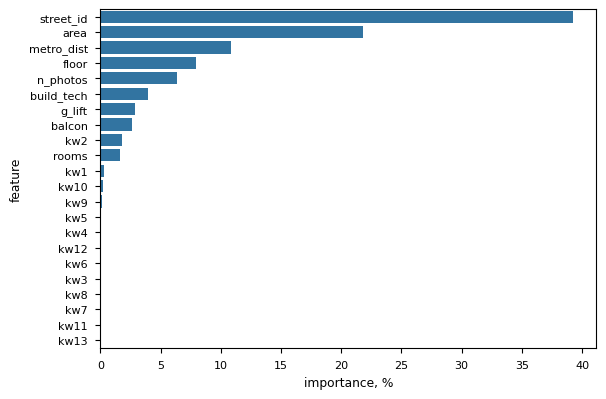

In [39]:
sort = np.argsort(model.feature_importances_ / sum(model.feature_importances_) * 100)[::-1]
feature_name = []
for i in sort:
    feature_name.append(model.feature_name_[i])

sns.barplot(x=model.feature_importances_[sort] / sum(model.feature_importances_) * 100, y=feature_name)
plt.xlabel("importance, %")
plt.ylabel("feature")
plt.show()

In [40]:
out = pd.DataFrame()
out['id'] = Id
out['price'] = model.predict(test_df)

In [41]:
out.to_csv("out.csv", index=False)

Построим модель без слабых признаков

In [42]:
train_df.drop(feature_name[10:], axis=1, inplace=True)
test_df.drop(feature_name[10:], axis=1, inplace=True)

In [43]:
y = train_df['price']
x = train_df.drop(['price'], axis=1)

In [44]:
def objective(trial):
    
    X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=2024)
    
    param = {
        'n_jobs': -1,
        'metric': 'l2', 
        'random_state': 2024,
        
        'n_estimators': trial.suggest_int('n_estimators', 500, 10000),
        'max_depth': trial.suggest_int('max_depth', 10, 200),
        'num_leaves' : trial.suggest_int('num_leaves', 1, 1000),
        'min_child_samples': trial.suggest_int('min_child_samples', 20, 300),
        
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-3, 100),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-3, 100),
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.2),
        
        'subsample': trial.suggest_categorical('subsample', [0.5, 0.7, 0.8, 0.9, 1.0]),
        'subsample_freq': trial.suggest_categorical('subsample_freq', [10, 50 ,100, 1000]),

        'early_stopping_rounds': 100,
        'verbose': -1
    }
    
    model = LGBMRegressor(**param)  
    
    model.fit(X_train, y_train, eval_set=[(X_val, y_val)])
    
    preds = model.predict(X_val)
    
    return score(y_val, preds)

In [45]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

[I 2024-05-10 13:12:34,092] A new study created in memory with name: no-name-c2077ff6-3711-44d7-8f19-e65e9ce39b34
[I 2024-05-10 13:12:48,213] Trial 0 finished with value: 6.817165989060034e-07 and parameters: {'n_estimators': 2166, 'max_depth': 164, 'num_leaves': 831, 'min_child_samples': 127, 'reg_alpha': 75.56011558197237, 'reg_lambda': 34.226806554480405, 'learning_rate': 0.1180096152782084, 'subsample': 0.8, 'subsample_freq': 50}. Best is trial 0 with value: 6.817165989060034e-07.
[I 2024-05-10 13:13:02,645] Trial 1 finished with value: 6.876873957113939e-07 and parameters: {'n_estimators': 2272, 'max_depth': 89, 'num_leaves': 494, 'min_child_samples': 237, 'reg_alpha': 30.042193657827976, 'reg_lambda': 30.928669465688838, 'learning_rate': 0.08265781588363101, 'subsample': 0.9, 'subsample_freq': 100}. Best is trial 1 with value: 6.876873957113939e-07.
[I 2024-05-10 13:13:11,848] Trial 2 finished with value: 6.724923495859281e-07 and parameters: {'n_estimators': 3274, 'max_depth': 4

In [46]:
params = {
        'n_jobs': -1,
        'metric': 'l2', 
        'random_state': 2024,
        
        'n_estimators': 0,
        'max_depth': 0,
        'num_leaves' : 0,
        'min_child_samples': 0,
        
        'reg_alpha': 0,
        'reg_lambda': 0,
        'learning_rate': 0,
        
        'subsample': 0,
        'subsample_freq': 0,

        'early_stopping_rounds': 100,
        'verbose': -1
}
for key, val in study.best_params.items():
    params[key] = val

In [47]:
params

{'n_jobs': -1,
 'metric': 'l2',
 'random_state': 2024,
 'n_estimators': 6213,
 'max_depth': 121,
 'num_leaves': 70,
 'min_child_samples': 23,
 'reg_alpha': 70.95602084959343,
 'reg_lambda': 76.01856716908426,
 'learning_rate': 0.11909117103509774,
 'subsample': 1.0,
 'subsample_freq': 1000,
 'early_stopping_rounds': 100,
 'verbose': -1}

In [48]:
X_train, X_val, y_train, y_val = train_test_split(x, y,
                                                  train_size=0.8, random_state=42, shuffle=True)

In [49]:
model = LGBMRegressor(**params)

model.fit(X_train, y_train, eval_set=[(X_val, y_val)])

LGBMRegressor(early_stopping_rounds=100, learning_rate=0.11909117103509774,
              max_depth=121, metric='l2', min_child_samples=23,
              n_estimators=6213, n_jobs=-1, num_leaves=70, random_state=2024,
              reg_alpha=70.95602084959343, reg_lambda=76.01856716908426,
              subsample_freq=1000, verbose=-1)

In [50]:
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

print("R2 for train samples", r2_score(y_train, y_train_pred))
print("R2 for validation samples",r2_score(y_val, y_val_pred))

print("Score for train samples", score(y_train, y_train_pred))
print("Score for validation samples",score(y_val, y_val_pred))

R2 for train samples 0.8439532646092611
R2 for validation samples 0.7287221632670793
Score for train samples 8.765364580110831e-07
Score for validation samples 7.280527580395022e-07


In [51]:
out = pd.DataFrame()
out['id'] = Id
out['price'] = model.predict(test_df)
out.to_csv("out.csv", index=False)

Удалим хвост по ценам

In [52]:
train_df = train_df.loc[train_df['price'] < 2e7]

In [53]:
y = train_df['price'];
x = train_df.drop(['price'], axis=1)

In [55]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

[I 2024-05-10 13:31:21,796] A new study created in memory with name: no-name-77ed8a32-9eb5-4882-abfa-78f70f9c4d67
[I 2024-05-10 13:31:29,692] Trial 0 finished with value: 7.548834381735987e-07 and parameters: {'n_estimators': 4676, 'max_depth': 99, 'num_leaves': 557, 'min_child_samples': 186, 'reg_alpha': 25.91738860242016, 'reg_lambda': 48.94409615175772, 'learning_rate': 0.10485021288261977, 'subsample': 0.9, 'subsample_freq': 10}. Best is trial 0 with value: 7.548834381735987e-07.
[I 2024-05-10 13:31:32,964] Trial 1 finished with value: 7.451922705501554e-07 and parameters: {'n_estimators': 2227, 'max_depth': 105, 'num_leaves': 53, 'min_child_samples': 67, 'reg_alpha': 33.79751090523597, 'reg_lambda': 15.056579933751829, 'learning_rate': 0.13246884102856807, 'subsample': 0.5, 'subsample_freq': 100}. Best is trial 0 with value: 7.548834381735987e-07.
[I 2024-05-10 13:31:46,550] Trial 2 finished with value: 7.34778615593892e-07 and parameters: {'n_estimators': 5420, 'max_depth': 167, 

In [56]:
params = {
        'n_jobs': -1,
        'metric': 'l2', 
        'random_state': 2024,
        
        'n_estimators': 0,
        'max_depth': 0,
        'num_leaves' : 0,
        'min_child_samples': 0,
        
        'reg_alpha': 0,
        'reg_lambda': 0,
        'learning_rate': 0,
        
        'subsample': 0,
        'subsample_freq': 0,

        'early_stopping_rounds': 100,
        'verbose': -1
}

for key, val in study.best_params.items():
    params[key] = val

params

{'n_jobs': -1,
 'metric': 'l2',
 'random_state': 2024,
 'n_estimators': 6590,
 'max_depth': 25,
 'num_leaves': 294,
 'min_child_samples': 36,
 'reg_alpha': 85.26825819640803,
 'reg_lambda': 40.469820105508475,
 'learning_rate': 0.03623133868122893,
 'subsample': 1.0,
 'subsample_freq': 1000,
 'early_stopping_rounds': 100,
 'verbose': -1}

In [57]:
X_train, X_val, y_train, y_val = train_test_split(x, y,
                                                  train_size=0.8, random_state=42, shuffle=True)

In [58]:
model = LGBMRegressor(**params)

model.fit(X_train, y_train, eval_set=[(X_val, y_val)])

LGBMRegressor(early_stopping_rounds=100, learning_rate=0.03623133868122893,
              max_depth=25, metric='l2', min_child_samples=36,
              n_estimators=6590, n_jobs=-1, num_leaves=294, random_state=2024,
              reg_alpha=85.26825819640803, reg_lambda=40.469820105508475,
              subsample_freq=1000, verbose=-1)

In [59]:
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

print("R2 for train samples", r2_score(y_train, y_train_pred))
print("R2 for validation samples",r2_score(y_val, y_val_pred))

print("Score for train samples", score(y_train, y_train_pred))
print("Score for validation samples",score(y_val, y_val_pred))

R2 for train samples 0.7881000237927522
R2 for validation samples 0.6322189390836384
Score for train samples 9.851099346663394e-07
Score for validation samples 7.737749384541397e-07


In [60]:
out = pd.DataFrame()
out['id'] = Id
out['price'] = model.predict(test_df)
out.to_csv("out.csv", index=False)

<Axes: ylabel='Count'>

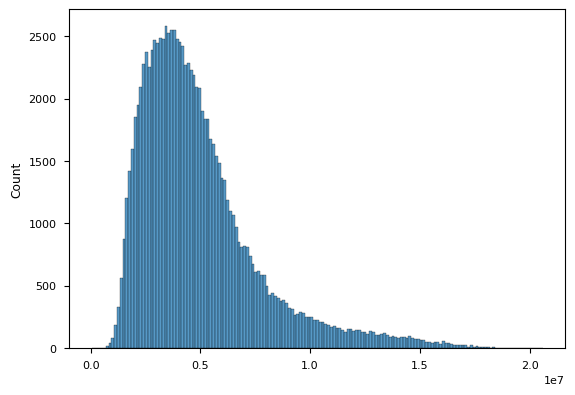

In [61]:
sns.histplot(model.predict(test_df))

Удаление выбросов по ценам не дало хороших результаотв, т. к. ограничили обсласть цен

# Построение итоговой модели

<Axes: xlabel='price', ylabel='Count'>

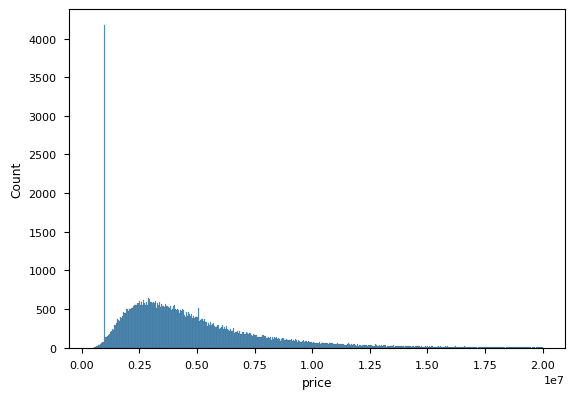

In [62]:
sns.histplot(train_df.price, bins=600)

Как видно, в выборке имеется большое количество элементов с ценой 1e6

In [63]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

train_df.drop('id', axis=1, inplace=True)
Id = test_df['id']
test_df.drop('id', axis=1, inplace=True)

In [64]:
train_df.drop('date', axis=1, inplace=True)
test_df.drop('date', axis=1, inplace=True)

In [65]:
from collections import defaultdict
street_mean_dist = defaultdict(list)
for id in train_df['street_id']:
  street_mean_dist[id] = train_df['metro_dist'][train_df['street_id'] == id].mean()

train_df.metro_dist = train_df.metro_dist.fillna(train_df.street_id.map(street_mean_dist))
test_df.metro_dist = test_df.metro_dist.fillna(test_df.street_id.map(street_mean_dist))

Удалим часть выборки с ценой 1е6

In [66]:
train_df.drop(train_df[train_df.price==1e6].index[::2], axis=0, inplace=True)
train_df.drop(train_df[train_df.price==1e6].index[::2], axis=0, inplace=True)
train_df.drop(train_df[train_df.price==1e6].index[::2], axis=0, inplace=True)
train_df.drop(train_df[train_df.price==1e6].index[::2], axis=0, inplace=True)
train_df.drop(train_df[train_df.price==1e6].index[::2], axis=0, inplace=True)
train_df.drop(train_df[train_df.price==1e6].index[::2], axis=0, inplace=True)

Выбросим признаки имеющие маленький вклад и build_tech

In [67]:
train_df.drop(feature_name[10:], axis=1, inplace=True)
test_df.drop(feature_name[10:], axis=1, inplace=True)
test_df.drop('build_tech', axis=1, inplace=True)
train_df.drop('build_tech', axis=1, inplace=True)

Логарифмируем целевую переменную

In [68]:
y = np.log(train_df['price'])
x = train_df.drop(['price'], axis=1)

In [69]:
x.g_lift = x.g_lift.fillna(1)
test_df.g_lift = test_df.g_lift.fillna(1)

Обозначим категориальные признаки

In [70]:
for col in ["street_id", "floor", "rooms", "balcon", "g_lift", "n_photos", "kw2"]:
    x[col] = x[col].astype('category')
    test_df[col] = test_df[col].astype('category')

In [105]:
def objective(trial):
    
    X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=2024)
    
    param = {
        'n_jobs': -1,
        'metric': 'l2', 
        'random_state': 2024,
        
        'n_estimators': trial.suggest_int('n_estimators', 500, 5000),
        'max_depth': trial.suggest_int('max_depth', 4, 10),
        'num_leaves' : trial.suggest_int('num_leaves', 32, 100),
        'min_child_samples': trial.suggest_int('min_child_samples', 50, 500),
        
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 100),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 100),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.2),
        
        'subsample': trial.suggest_categorical('subsample', [0.5, 0.8, 1.0]),
        'subsample_freq': trial.suggest_categorical('subsample_freq', [10, 100, 1000]),
        
        'early_stopping_rounds': 100,
        
        'verbose': -1
    }
    
    model = LGBMRegressor(**param)  
    
    model.fit(X_train, y_train, eval_set=[(X_val, y_val)])
    
    preds = model.predict(X_val)
    
    return mean_squared_error(y_val, preds)

In [72]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

[I 2024-05-10 13:44:54,614] A new study created in memory with name: no-name-71668d78-9569-403d-9d77-ad26c1f7ceb8
[I 2024-05-10 13:44:57,834] Trial 0 finished with value: 0.027595759824086828 and parameters: {'n_estimators': 2135, 'max_depth': 9, 'num_leaves': 93, 'min_child_samples': 496, 'reg_alpha': 5.205560286212007, 'reg_lambda': 42.18867063240609, 'learning_rate': 0.0651944881366461, 'subsample': 0.5, 'subsample_freq': 10}. Best is trial 0 with value: 0.027595759824086828.
[I 2024-05-10 13:44:58,902] Trial 1 finished with value: 0.02582960014414123 and parameters: {'n_estimators': 3747, 'max_depth': 5, 'num_leaves': 83, 'min_child_samples': 76, 'reg_alpha': 10.247837773794288, 'reg_lambda': 62.61662432175804, 'learning_rate': 0.18406091318427867, 'subsample': 1.0, 'subsample_freq': 1000}. Best is trial 1 with value: 0.02582960014414123.
[I 2024-05-10 13:45:00,534] Trial 2 finished with value: 0.028204787471976866 and parameters: {'n_estimators': 1004, 'max_depth': 4, 'num_leaves'

In [73]:
params = {
        'n_jobs': -1,
        'metric': 'l2', 
        'random_state': 2024,
        
        'n_estimators': 0,
        'max_depth': 0,
        'num_leaves' : 0,
        'min_child_samples': 0,
        
        'reg_alpha': 0,
        'reg_lambda': 0,
        'learning_rate': 0,
        
        'subsample': 0,
        'subsample_freq': 0,
        'early_stopping_rounds': 100,

        'verbose': -1
}

for key, val in study.best_params.items():
    params[key] = val

params

{'n_jobs': -1,
 'metric': 'l2',
 'random_state': 2024,
 'n_estimators': 2974,
 'max_depth': 4,
 'num_leaves': 88,
 'min_child_samples': 197,
 'reg_alpha': 8.60975846858123,
 'reg_lambda': 24.34827691161101,
 'learning_rate': 0.05482658754773092,
 'subsample': 1.0,
 'subsample_freq': 100,
 'early_stopping_rounds': 100,
 'verbose': -1}

In [74]:
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.1, random_state=2024)

In [75]:
model = LGBMRegressor(**params)

model.fit(X_train, y_train, eval_set=[(X_val, y_val)])

LGBMRegressor(early_stopping_rounds=100, learning_rate=0.05482658754773092,
              max_depth=4, metric='l2', min_child_samples=197,
              n_estimators=2974, n_jobs=-1, num_leaves=88, random_state=2024,
              reg_alpha=8.60975846858123, reg_lambda=24.34827691161101,
              subsample_freq=100, verbose=-1)

In [76]:
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

print("R2 for train samples", r2_score(y_train, y_train_pred))
print("R2 for validation samples",r2_score(y_val, y_val_pred))

print("Score for train samples", score(y_train, y_train_pred))
print("Score for validation samples",score(y_val, y_val_pred))

R2 for train samples 0.9555166163461817
R2 for validation samples 0.9398533871231476
Score for train samples 0.9095642292718181
Score for validation samples 0.8980725349828176


In [77]:
out = pd.DataFrame()
out['id'] = Id
out['price'] = np.exp(model.predict(test_df))
out.to_csv("out.csv", index=False)

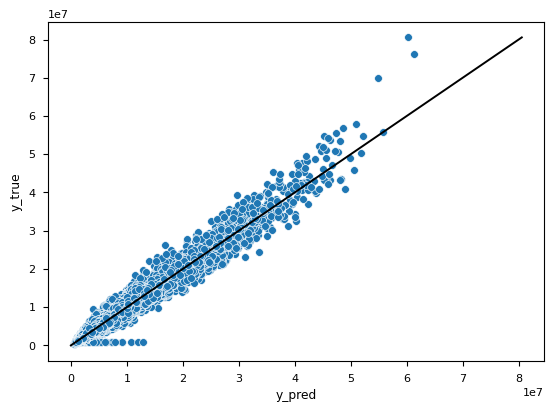

In [78]:
sns.scatterplot(x=np.exp(y_train_pred), y=np.exp(y_train))
plt.plot([0, np.exp(y_train).max()], [0, np.exp(y_train).max()], color='black')
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

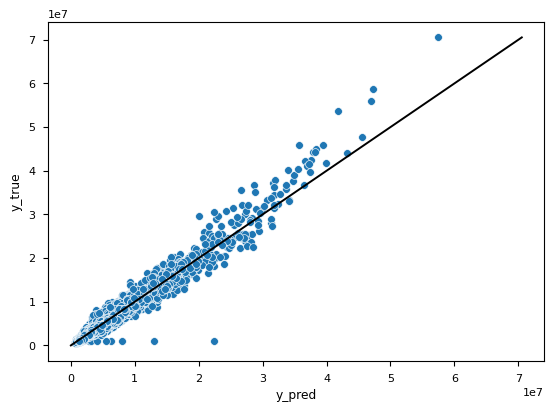

In [79]:
sns.scatterplot(x=np.exp(y_val_pred), y=np.exp(y_val))
plt.plot([0, np.exp(y_val).max()], [0, np.exp(y_val).max()], color='black')
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# ВАУ! Сделав категориальные признаками категориальным типом, получили огромный прирост в результатах из-за особенностей LGBM

# Рандом форест

In [80]:
from sklearn.ensemble import RandomForestRegressor

In [81]:
def objective(trial):
    
    X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=2024)
    
    param = {
        'n_jobs': -1,
        'random_state': 2024,
        'max_features': 0.3,
        'n_estimators': trial.suggest_int('n_estimators', 10, 1000),
        'max_depth': trial.suggest_int('max_depth', 10, 200),
        'min_samples_split': trial.suggest_int('min_samples_split', 10, 100),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 2)
    }
    
    model = RandomForestRegressor(**param)  
    
    model.fit(X_train, y_train)
    
    preds = model.predict(X_val)
    
    return mean_squared_error(y_val, preds)

In [82]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

[I 2024-05-10 13:48:05,236] A new study created in memory with name: no-name-05fbc691-df40-4c66-8ee2-43d6c3a11739
[I 2024-05-10 13:48:06,333] Trial 0 finished with value: 0.16465394826904048 and parameters: {'n_estimators': 81, 'max_depth': 36, 'min_samples_split': 52, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.16465394826904048.
[I 2024-05-10 13:48:16,095] Trial 1 finished with value: 0.16267658218744205 and parameters: {'n_estimators': 762, 'max_depth': 27, 'min_samples_split': 24, 'min_samples_leaf': 1}. Best is trial 1 with value: 0.16267658218744205.
[I 2024-05-10 13:48:18,452] Trial 2 finished with value: 0.16530007734202454 and parameters: {'n_estimators': 186, 'max_depth': 169, 'min_samples_split': 68, 'min_samples_leaf': 1}. Best is trial 1 with value: 0.16267658218744205.
[I 2024-05-10 13:48:30,007] Trial 3 finished with value: 0.16263287412721494 and parameters: {'n_estimators': 780, 'max_depth': 85, 'min_samples_split': 24, 'min_samples_leaf': 1}. Best is trial 3

In [83]:
params = {
        'n_jobs': -1,
        'random_state': 2024,
        
        'n_estimators': 0,
        'max_depth': 0,
        'min_samples_split': 0,
        'min_samples_leaf': 0
    }

for key, val in study.best_params.items():
    params[key] = val

params

{'n_jobs': -1,
 'random_state': 2024,
 'n_estimators': 993,
 'max_depth': 70,
 'min_samples_split': 18,
 'min_samples_leaf': 1}

In [84]:
rf = RandomForestRegressor(**params)

rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=70, min_samples_split=18, n_estimators=993,
                      n_jobs=-1, random_state=2024)

In [85]:
y_train_pred = rf.predict(X_train)
y_val_pred = rf.predict(X_val)

print("R2 for train samples", r2_score(y_train, y_train_pred))
print("R2 for validation samples",r2_score(y_val, y_val_pred))

print("Score for train samples", score(y_train, y_train_pred))
print("Score for validation samples",score(y_val, y_val_pred))

R2 for train samples 0.806472101278036
R2 for validation samples 0.6702313932152617
Score for train samples 0.8215600360128299
Score for validation samples 0.779854421238763


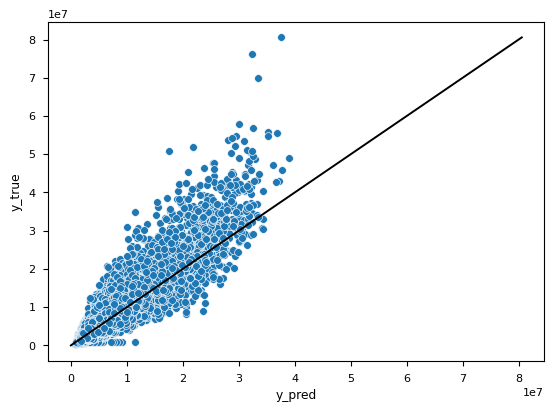

In [86]:
sns.scatterplot(x=np.exp(y_train_pred), y=np.exp(y_train))
plt.plot([0, np.exp(y_train).max()], [0, np.exp(y_train).max()], color='black')
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

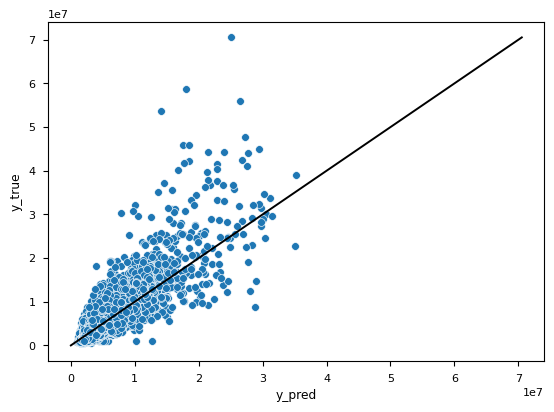

In [87]:
sns.scatterplot(x=np.exp(y_val_pred), y=np.exp(y_val))
plt.plot([0, np.exp(y_val).max()], [0, np.exp(y_val).max()], color='black')
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

RF плохо работает для нашей задачи

## Попробуем учесть дату

In [107]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

train_df.drop('id', axis=1, inplace=True)
Id = test_df['id']
test_df.drop('id', axis=1, inplace=True)

<Axes: xlabel='price', ylabel='date'>

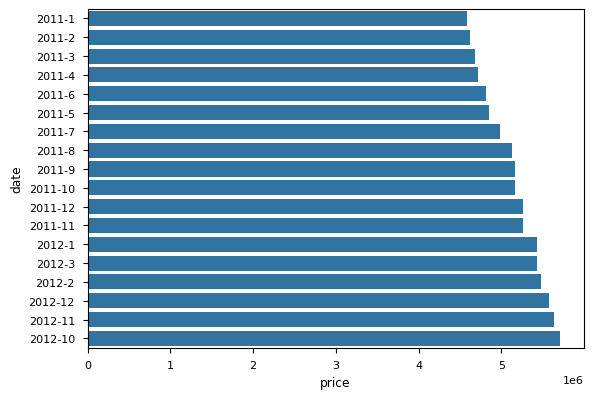

In [108]:
sns.barplot(data=train_df[['price', 'date']].groupby('date').mean().sort_values(by=['price']), x='price', y='date')

In [109]:
train_df['month'] = pd.to_datetime(train_df.date, format = '%Y-%m').dt.month
train_df['year'] = pd.to_datetime(train_df.date, format = '%Y-%m').dt.year

test_df['month'] = pd.to_datetime(test_df.date, format = '%Y-%m').dt.month
test_df['year'] = pd.to_datetime(test_df.date, format = '%Y-%m').dt.year

Попробуем записать дату в следующем виде: 1 - самая маленькая дата, далее с увеличением месяца прибавлять 1

In [110]:
from collections import defaultdict
date_dict = defaultdict(list)
for i in range(len(train_df.year.unique())):
    for j in range(len(train_df.month.unique())):
        date_dict[f"{train_df.year.unique()[i]}-{train_df.month.unique()[j]}"] = (train_df.year.unique()[i] - 2011) * 12 + train_df.month.unique()[j]

In [111]:
for i in range(len(test_df.year.unique())):
    for j in range(len(test_df.month.unique())):
        date_dict[f"{test_df.year.unique()[i]}-{test_df.month.unique()[j]}"] = (test_df.year.unique()[i] - 2011) * 12 + test_df.month.unique()[j]

In [112]:
date_dict

defaultdict(list,
            {'2011-1': 1,
             '2011-10': 10,
             '2011-11': 11,
             '2011-12': 12,
             '2011-2': 2,
             '2011-3': 3,
             '2011-4': 4,
             '2011-5': 5,
             '2011-6': 6,
             '2011-7': 7,
             '2011-8': 8,
             '2011-9': 9,
             '2012-1': 13,
             '2012-10': 22,
             '2012-11': 23,
             '2012-12': 24,
             '2012-2': 14,
             '2012-3': 15,
             '2012-4': 16,
             '2012-5': 17,
             '2012-6': 18,
             '2012-7': 19,
             '2012-8': 20,
             '2012-9': 21,
             '2013-3': 27,
             '2013-4': 28,
             '2013-5': 29,
             '2013-6': 30,
             '2013-7': 31,
             '2013-8': 32,
             '2013-9': 33,
             '2013-1': 25,
             '2013-10': 34,
             '2013-11': 35,
             '2013-12': 36,
             '2013-2': 26})

In [113]:
train_df.date = train_df.replace({'date': date_dict}).date
test_df.date = test_df.replace({'date': date_dict}).date

/var/folders/qf/vg7dk1w94z50380v7kvdc4ph0000gn/T/ipykernel_99191/747786321.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df.date = train_df.replace({'date': date_dict}).date
/var/folders/qf/vg7dk1w94z50380v7kvdc4ph0000gn/T/ipykernel_99191/747786321.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df.date = test_df.replace({'date': date_dict}).date


In [114]:
train_df.drop('month', axis=1, inplace=True)
test_df.drop('month', axis=1, inplace=True)

train_df.drop('year', axis=1, inplace=True)
test_df.drop('year', axis=1, inplace=True)

In [115]:
from collections import defaultdict
street_mean_dist = defaultdict(list)
for id in train_df['street_id'].unique():
  street_mean_dist[id] = train_df['metro_dist'][train_df['street_id'] == id].mean()

train_df.metro_dist = train_df.metro_dist.fillna(train_df.street_id.map(street_mean_dist))
test_df.metro_dist = test_df.metro_dist.fillna(test_df.street_id.map(street_mean_dist))

In [116]:
train_df.drop(train_df[train_df.price==1e6].index[::2], axis=0, inplace=True)
train_df.drop(train_df[train_df.price==1e6].index[::2], axis=0, inplace=True)
train_df.drop(train_df[train_df.price==1e6].index[::2], axis=0, inplace=True)
train_df.drop(train_df[train_df.price==1e6].index[::2], axis=0, inplace=True)
train_df.drop(train_df[train_df.price==1e6].index[::2], axis=0, inplace=True)
train_df.drop(train_df[train_df.price==1e6].index[::2], axis=0, inplace=True)

In [117]:
train_df.drop(feature_name[10:], axis=1, inplace=True)
test_df.drop(feature_name[10:], axis=1, inplace=True)

In [118]:
y = np.log(train_df['price'])
x = train_df.drop(['price'], axis=1)

In [119]:
for col in ["street_id", "floor", "rooms", "balcon", "g_lift", "n_photos", "kw2", "build_tech"]:
    x[col] = x[col].astype('category')
    test_df[col] = test_df[col].astype('category')

In [120]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

[I 2024-05-10 14:09:33,214] A new study created in memory with name: no-name-cd002b80-be55-4b4c-8754-b7d8ad89cde2
[I 2024-05-10 14:09:33,856] Trial 0 finished with value: 0.020556512557874346 and parameters: {'n_estimators': 4186, 'max_depth': 8, 'num_leaves': 89, 'min_child_samples': 120, 'reg_alpha': 48.49221780102777, 'reg_lambda': 50.346872643327835, 'learning_rate': 0.14759110483572888, 'subsample': 1.0, 'subsample_freq': 10}. Best is trial 0 with value: 0.020556512557874346.
[I 2024-05-10 14:09:35,005] Trial 1 finished with value: 0.022340854668629867 and parameters: {'n_estimators': 3736, 'max_depth': 8, 'num_leaves': 72, 'min_child_samples': 334, 'reg_alpha': 75.05319963936567, 'reg_lambda': 34.962668439418096, 'learning_rate': 0.08320257859685519, 'subsample': 0.8, 'subsample_freq': 100}. Best is trial 0 with value: 0.020556512557874346.
[I 2024-05-10 14:09:35,739] Trial 2 finished with value: 0.02237346511953797 and parameters: {'n_estimators': 3929, 'max_depth': 10, 'num_lea

In [121]:
params = {
        'n_jobs': -1,
        'metric': 'l2', 
        'random_state': 2024,
        
        'n_estimators': 0,
        'max_depth': 0,
        'num_leaves' : 0,
        'min_child_samples': 0,
        
        'reg_alpha': 0,
        'reg_lambda': 0,
        'learning_rate': 0,
        
        'subsample': 0,
        'subsample_freq': 0,
        'early_stopping_rounds': 100,

        'verbose': -1
}

for key, val in study.best_params.items():
    params[key] = val

params

{'n_jobs': -1,
 'metric': 'l2',
 'random_state': 2024,
 'n_estimators': 2613,
 'max_depth': 5,
 'num_leaves': 70,
 'min_child_samples': 113,
 'reg_alpha': 0.3251359162473779,
 'reg_lambda': 56.26732963440131,
 'learning_rate': 0.027914181962493612,
 'subsample': 1.0,
 'subsample_freq': 10,
 'early_stopping_rounds': 100,
 'verbose': -1}

In [122]:
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.1, random_state=2024)

In [123]:
model = LGBMRegressor(**params)

model.fit(X_train, y_train, eval_set=[(X_val, y_val)])

LGBMRegressor(early_stopping_rounds=100, learning_rate=0.027914181962493612,
              max_depth=5, metric='l2', min_child_samples=113,
              n_estimators=2613, n_jobs=-1, num_leaves=70, random_state=2024,
              reg_alpha=0.3251359162473779, reg_lambda=56.26732963440131,
              subsample_freq=10, verbose=-1)

In [124]:
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

print("R2 for train samples", r2_score(y_train, y_train_pred))
print("R2 for validation samples",r2_score(y_val, y_val_pred))

print("Score for train samples", score(y_train, y_train_pred))
print("Score for validation samples",score(y_val, y_val_pred))

R2 for train samples 0.974889245448996
R2 for validation samples 0.9590676097174718
Score for train samples 0.9339932919322798
Score for validation samples 0.9190730197082891


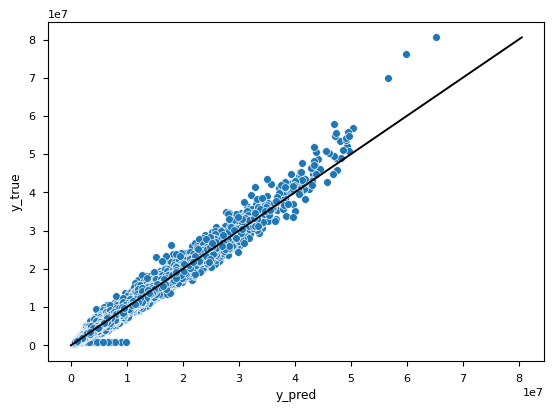

In [125]:
sns.scatterplot(x=np.exp(y_train_pred), y=np.exp(y_train))
plt.plot([0, np.exp(y_train).max()], [0, np.exp(y_train).max()], color='black')
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

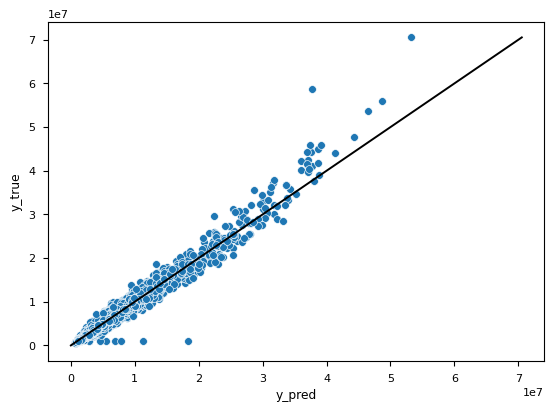

In [126]:
sns.scatterplot(x=np.exp(y_val_pred), y=np.exp(y_val))
plt.plot([0, np.exp(y_val).max()], [0, np.exp(y_val).max()], color='black')
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [127]:
out = pd.DataFrame()
out['id'] = Id
out['price'] = np.exp(model.predict(test_df))
out.to_csv("out.csv", index=False)

# ВЫВОД

Параметры модели lgbm: <br>

'metric': 'l2'<br>
 'random_state': 2024<br>
 'n_estimators': 1908<br>
 'max_depth': 5<br>
 'num_leaves': 33<br>
 'min_child_samples': 157<br>
 'reg_alpha': 1.403550583775798<br>
 'reg_lambda': 87.91101347600917<br>
 'learning_rate': 0.05559403290102822<br>
 'early_stopping_rounds': 100<br>


Используемые признаки: <br>

date<br>
street_id <br>
area <br>
floor<br>
rooms<br>
balcon<br>
g_lift<br>
n_photos<br>
kw2<br>
build_tech<br>
metro_dist<br>

Результаты модели

In [128]:
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

print("R2 for train samples", r2_score(y_train, y_train_pred))
print("R2 for validation samples",r2_score(y_val, y_val_pred))

print("Score for train samples", score(y_train, y_train_pred))
print("Score for validation samples",score(y_val, y_val_pred))

R2 for train samples 0.974889245448996
R2 for validation samples 0.9590676097174718
Score for train samples 0.9339932919322798
Score for validation samples 0.9190730197082891


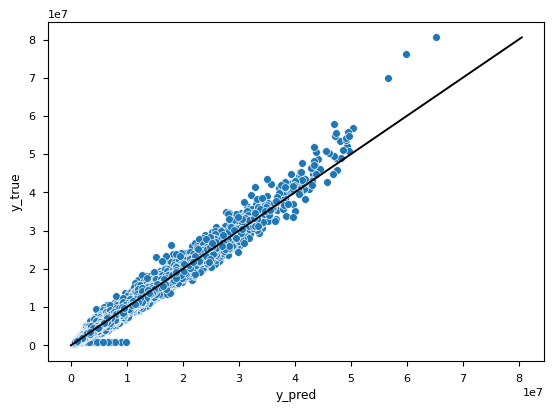

In [129]:
sns.scatterplot(x=np.exp(y_train_pred), y=np.exp(y_train))
plt.plot([0, np.exp(y_train).max()], [0, np.exp(y_train).max()], color='black')
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

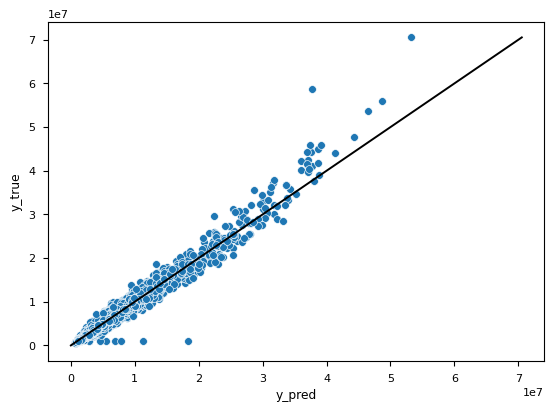

In [130]:
sns.scatterplot(x=np.exp(y_val_pred), y=np.exp(y_val))
plt.plot([0, np.exp(y_val).max()], [0, np.exp(y_val).max()], color='black')
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

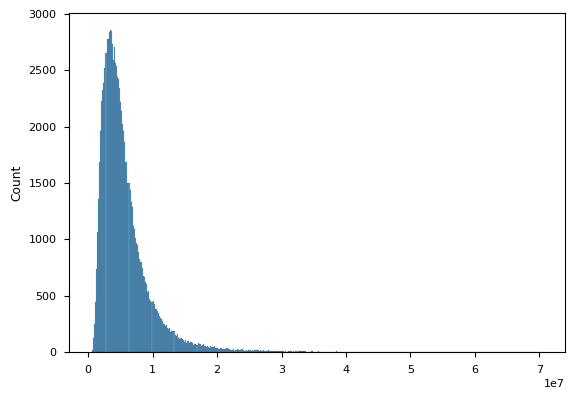

In [131]:
sns.histplot(np.exp(model.predict(test_df)))
plt.show()